# LCRTest1

## Imports

In [1]:
# Imports functions into the program
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#These are imported specifically for the use of the histogram.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import gridspec
from scipy import stats

#Imported for categorization of the Sources
from fractional_variability import fvar
from fermi_catalog import select_bll, select_fsrq, select_bcu

## 3 Day Daily Cadence

In [2]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)

cadence = 'daily'
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
#print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]

df_4lacdr3 = pd.read_csv('4lac_redshifts.csv', delimiter='\t', comment='#')


In [3]:
fsrq_df = select_fsrq()
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
fsrq_nanbins = []
fsrq_nanbinsmatrix = []
for i, fsrq in enumerate(fsrq_names):
    #print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_nanbins.append(len(source_array[source_array['photon_flux2']== -3333]))
    fsrq_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)
fsrq_nanbinsmatrix = np.array(fsrq_nanbinsmatrix)

-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572


In [4]:
bll_df = select_bll()
bll_names = bll_df['Source_Name']

bll_fmatrix = []
bll_fractionalflux = []
bll_nanbins = []
bll_nanbinsmatrix = []
for i, bll in enumerate(bll_names):
    # print(i, bll)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bll_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bll_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bll_fmatrix.append(factors.tolist())
    bll_fractionalflux.append([bll, averageflux, var, var_err])

bll_fmatrix = np.array(bll_fmatrix)
bll_nanbinsmatrix = np.array(bll_nanbinsmatrix)


-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477


In [5]:
bcu_df = select_bcu()
bcu_names = bcu_df['Source_Name']

bcu_fmatrix = []
bcu_fractionalflux = []
bcu_nanbins = []
bcu_nanbinsmatrix = []
for i, bcu in enumerate(bcu_names):
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bcu]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bcu_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bcu_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bcu_fmatrix.append(factors.tolist())
    bcu_fractionalflux.append([bll, averageflux, var, var_err])

bcu_fmatrix = np.array(bcu_fmatrix)
bcu_nanbinsmatrix = np.array(bcu_nanbinsmatrix)


-----------------------------
Selecting unknown type blazars
Total number of variable objects: 364


In [6]:
# This function takes the dataframe of sources of variable objects, and the name of a source.
# It will sort through every entry in the dataframe, and detect consecutive entries with a flux level higher than the average.
# It counts the duration of these flaring states, and notes them in an array 'final', which it returns upon completion.
def flare_detector(name,dataframe):
    final = [0,0,0,0,0]
    temp =[]
    temp_err=[]
    duration = []
    average=[]
    # This section is for setting up our dataframes which will be used in the following loop.
    # We primarily are eliminating outliers and NaN values that were marked with -3333.
    sourcematrix = dataframe.loc[dataframe['source_name'] == name].reset_index(drop=True)
    fluxmatrix = sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'].reset_index(drop=True)
    averageflux = np.mean(sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'])
    errormatrix = sourcematrix[sourcematrix['photon_flux_error2']!=-3333]['photon_flux_error2'].reset_index(drop=True)
    boolmatrix = fluxmatrix/averageflux > 1  
    boolmatrix = boolmatrix.reset_index(drop=True)
    print(name)
    if len(df_4lacdr3.loc[(df_4lacdr3['redshift']>-3333)&(df_4lacdr3['4FGL_name']==name)]) > 0:
        sourceredshift = df_4lacdr3.loc[(df_4lacdr3['redshift']>-3333)&(df_4lacdr3['4FGL_name']==name)].values[0][1]
    else:
        sourceredshift = -3333
    print(sourceredshift)
    
    for i in range(len(fluxmatrix)):
        # If the flux value for index i is greater than the average, then this condition is met.
        if boolmatrix[i] == True:
            temp.append(fluxmatrix[i])
            temp_err.append(errormatrix[i])
        # If the flux value is not above average, and there are values stored in the temp array, we gather them and send them to 'final'.
        elif len(temp) != 0:
            if i != 0:
                duration = ((len(temp)))
                average = np.nanmean(temp)
                error = ((sum(k*k for k in temp_err))**0.5)*(1/(len(temp_err)))
                temp = []
                temp_err = []
                if len(final) == 0:
                    final = [name,duration,average,error,sourceredshift]
                else:
                    final = np.vstack([final,[name,duration,average,error,sourceredshift]])
        # Otherwise, we add a row of 0's to show that the source has no flaring states.
        #else:
            #final = np.vstack([final,[0,0,0]])


    return final

In [17]:
import numpy as np
import pandas as pd


# This function takes the dataframe of sources of variable objects, and the name of a source.
# It will sort through every entry in the dataframe, and detect consecutive entries with a flux level higher than the average.
# It counts the duration of these flaring states, and notes them in an array 'final', which it returns upon completion.
# Each row represents a flaring state, with characteristics of the flaring state in the following order:
# Name of the source,, duration of the flaring state, average flux, average flux error, and the redshift of the source.
df_4lacdr3 = pd.read_csv('4lac_redshifts.csv', delimiter='\t', comment='#')
def flare_detector(name,dataframe):
    final = [0,0,0,0,0]
    temp =[]
    temp_err=[]
    duration = []
    average=[]
    # This section is for setting up our dataframes which will be used in the following loop.
    # We primarily are eliminating outliers and NaN values that were marked with -3333.
    sourcematrix = dataframe.loc[dataframe['source_name'] == name].reset_index(drop=True)
    fluxmatrix = sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'].reset_index(drop=True)
    averageflux = np.mean(sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'])
    errormatrix = sourcematrix[sourcematrix['photon_flux_error2']!=-3333]['photon_flux_error2'].reset_index(drop=True)
    boolmatrix = fluxmatrix/averageflux > 1  
    boolmatrix = boolmatrix.reset_index(drop=True)
    if len(df_4lacdr3.loc[(df_4lacdr3['redshift']>-3333)&(df_4lacdr3['4FGL_name']==name)]) > 0:
        sourceredshift = df_4lacdr3.loc[(df_4lacdr3['redshift']>-3333)&(df_4lacdr3['4FGL_name']==name)].values[0][1]
    else:
        sourceredshift = -3333
    print(sourceredshift)
    
    for i in range(len(fluxmatrix)):
        # If the flux value for index i is greater than the average, then this condition is met.
        if boolmatrix[i] == True:
            temp.append(fluxmatrix[i])
            temp_err.append(errormatrix[i])
        # If the flux value is not above average, and there are values stored in the temp array, we gather them and send them to 'final'.
        elif len(temp) != 0:
            if i != 0:
                duration = ((len(temp)))
                average = np.nanmean(temp)
                error = ((sum(k*k for k in temp_err))**0.5)*(1/(len(temp_err)))
                temp = []
                temp_err = []
                if len(final) == 0:
                    final = [name,duration,average,error,sourceredshift]
                else:
                    final = np.vstack([final,[name,duration,average,error,sourceredshift]])
        # Otherwise, we add a row of 0's to show that the source has no flaring states.
        else:
            final = np.vstack([final,[0,0,0,0,0]])


    return final

In [18]:
# These three loops will run the flare_detector function for each category of blazar.

fsrq_flares = [0,0,0,0,0]
fsrq_flarenames = []
for i,name in enumerate(fsrq_names):
    #print(i,name) 
    #tempnames = []
    #tempflare = []
    tempflare = flare_detector(name,cadence_df)
    fsrq_flares = np.vstack([fsrq_flares,tempflare])
    #fsrq_flarenames.append(tempnames)

bll_flares = [0,0,0,0,0]
bll_flarenames = []
for i,name in enumerate(bll_names):
    #print(i,name) 
    #tempnames = []
    #tempflare = [0,0,0]
    tempflare = flare_detector(name,cadence_df)
    bll_flares = np.vstack([bll_flares,tempflare])
    #bll_flarenames.append(tempnames)

bcu_flares = [0,0,0,0,0]
bcu_flarenames = []
for i,name in enumerate(bcu_names):
    #print(i,name) 
    #tempnames = []
    #tempflare = [0,0,0]
    tempflare = flare_detector(name,cadence_df)
    bcu_flares = np.vstack([bcu_flares,tempflare])
    #bcu_flarenames.append(tempnames)

total_flares = [0,0,0,0,0]
total_flarenames = []
for i,name in enumerate(names):
    #print(i,name) 
    #tempnames = []
    #tempflare = [0,0,0]
    tempflare = flare_detector(name,cadence_df)
    total_flares = np.vstack([total_flares,tempflare])
    #bcu_flarenames.append(tempnames)



1.106
1.81
0.88
0.229
0.6
1.19
1.492
1.57631
0.227
1.781
0.354
1.062
0.545
-3333
0.495
1.196
0.966
1.032
1.033
1.161
1.797
0.92
1.975
1.749
1.2456
1.369
0.874
0.644
1.747
2.099


KeyboardInterrupt: 

       0
0      0
1      0
2      1
3      2
4      1
...   ..
32552  1
32553  1
32554  1
32555  2
32556  1

[32557 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

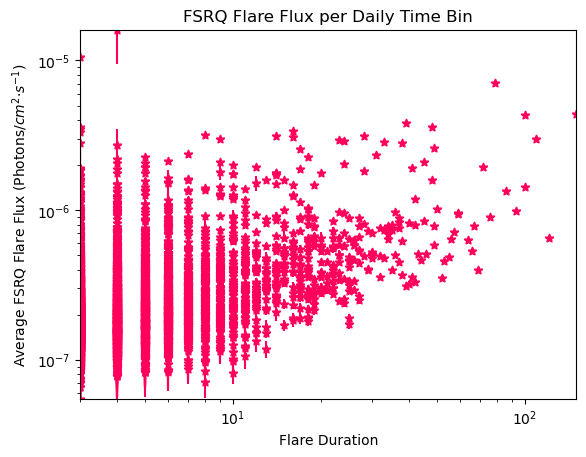

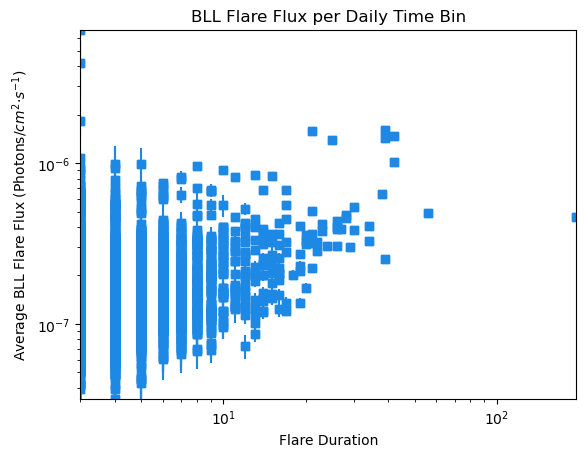

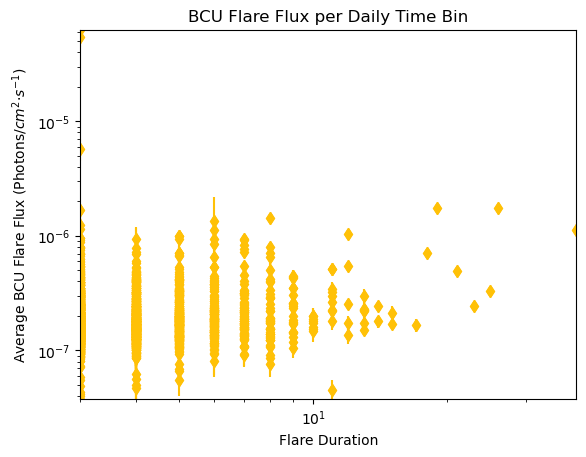

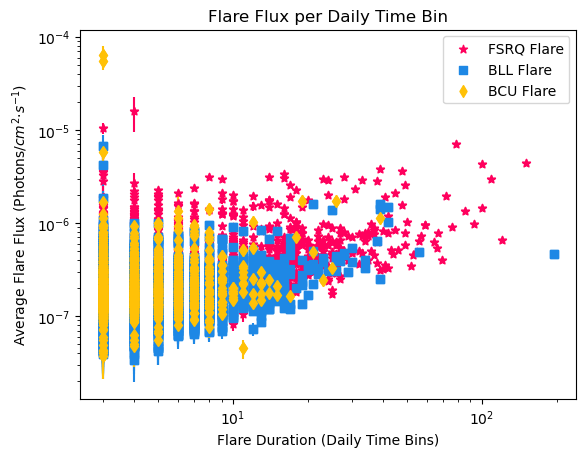

In [8]:

# This section makes four Average Flux vs Duration plots: one for each category of blazars, and a final plot for all three together.
print(pd.DataFrame(fsrq_flares[:,1]))
fsrq_plot = fsrq_flares[np.asarray(fsrq_flares[:,1],dtype='float64')>=3]
fsrq_ysize = fsrq_flares.size
fsrq_x = np.asarray(fsrq_plot[:,1],dtype='float64')
fsrq_xmin = min(fsrq_x)
fsrq_xmax = max(fsrq_x)
fsrq_y = np.asarray(fsrq_plot[:,2],dtype='float64')
fsrq_ymin = min(fsrq_y)
fsrq_ymax = max(fsrq_y)
fsrq_err= np.asarray(fsrq_plot[:,3],dtype='float64')
plt.ylim([fsrq_ymin,fsrq_ymax])
plt.xlim([fsrq_xmin,fsrq_xmax])
plt.scatter(fsrq_x,fsrq_y,marker = '*',color='#FF005D')
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = '*',color='#FF005D')
plt.ylabel('Average FSRQ Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration')
plt.title('FSRQ Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bll_plot = bll_flares[np.asarray(bll_flares[:,1],dtype='float64')>=3]
bll_ysize = bll_flares.size
bll_x = np.asarray(bll_plot[:,1],dtype='float64')
bll_xmin = min(bll_x)
bll_xmax = max(bll_x)
bll_y = np.asarray(bll_plot[:,2],dtype='float64')
bll_ymin = min(bll_y)
bll_ymax = max(bll_y)
bll_err = np.asarray(bll_plot[:,3],dtype='float64')
plt.ylim([bll_ymin,bll_ymax])
plt.xlim([bll_xmin,bll_xmax])
plt.scatter(bll_x,bll_y,marker = 's',color='#1E88E5',label='BLL Flare')
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 's',color='#1E88E5')
plt.ylabel('Average BLL Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration')
plt.title('BLL Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bcu_plot = bcu_flares[np.asarray(bcu_flares[:,1],dtype='float64')>=3]
ysize = bcu_flares.size
bcu_x = np.asarray(bcu_plot[:,1],dtype='float64')
bcu_xmin = min(bcu_x)
bcu_xmax = max(bcu_x)
bcu_y = np.asarray(bcu_plot[:,2],dtype='float64')
bcu_ymin = min(bcu_y)
bcu_ymax = max(bcu_y)
bcu_err = np.asarray(bcu_plot[:,3],dtype='float64')
plt.ylim([bcu_ymin,bcu_ymax])
plt.xlim([bcu_xmin,bcu_xmax])
plt.scatter(bcu_x,bcu_y,marker = 'd',color='#FFC107',label='BCU Flare')
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'd',color='#FFC107')
plt.ylabel('Average BCU Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration')
plt.title('BCU Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

#Combined Graphic
plt.scatter(fsrq_x,fsrq_y,marker = '*',color='#FF005D',label='FSRQ Flare')
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = '*',color='#FF005D')
plt.scatter(bll_x,bll_y,marker = 's',color='#1E88E5',label='BLL Flare')
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 's',color='#1E88E5')
plt.scatter(bcu_x,bcu_y,marker = 'd',color='#FFC107',label='BCU Flare')
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'd',color='#FFC107')
plt.legend()
plt.ylabel('Average Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Daily Time Bins)')
plt.title('Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(10,40)
#plt.ylim(0.0000001,0.000002)
plt.show
#Flux is 1/cm^2*s


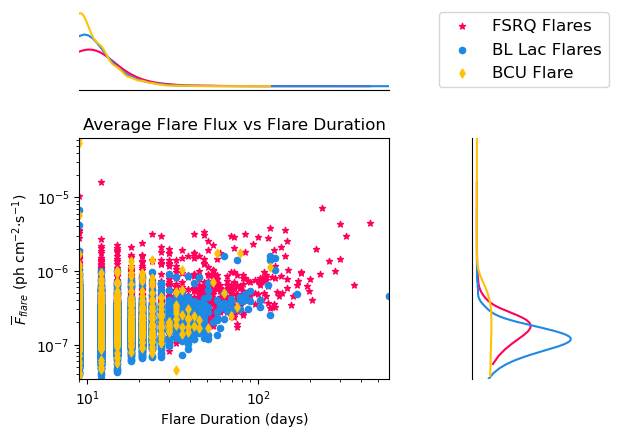

In [9]:
# Graph modified for 3 Day Daily Cadence
label = ['FSRQ Flares','BL Lac Flares','BCU Flare'] # List of labels for categories
cl = ['#FF005D','#1E88E5','#FFC107'] # List of colours for categories
categories = len(label)


# Set up 4 subplots as axis objects using GridSpec:
gs = gridspec.GridSpec(2, 2, width_ratios=[3,1], height_ratios=[1,3])
# Add space between scatter plot and KDE plots to accommodate axis labels:
gs.update(hspace=0.3, wspace=0.4)

# Set background canvas colour to White instead of grey default
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = plt.subplot(gs[1,0]) # Instantiate scatter plot area and axis range
#ax.set_ylim(10**-8,10**-5)
#ax.set_xlim(10,100)
ax.set_xlim(min(fsrq_xmin,bll_xmin,bcu_xmin)*3, max(fsrq_xmax,bll_xmax,bcu_xmax)*3)
ax.set_ylim(min(fsrq_ymin,bll_ymin,bcu_ymin), max(fsrq_ymax,bll_ymax,bcu_ymax))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Flare Duration (days)')
ax.set_ylabel('$\overline{F}$$_{flare}$ (ph cm$^{-2}$\u22c5s$^{-1}$)')
ax.set_title('Average Flare Flux vs Flare Duration')

axl = plt.subplot(gs[1,1], sharey=ax) # Instantiate left KDE plot area
axl.get_xaxis().set_visible(False) # Hide tick marks and spines
axl.get_yaxis().set_visible(False)
axl.spines["right"].set_visible(False)
axl.spines["top"].set_visible(False)
axl.spines["bottom"].set_visible(False)

axb = plt.subplot(gs[0,0], sharex=ax) # Instantiate bottom KDE plot area
axb.get_xaxis().set_visible(False) # Hide tick marks and spines
axb.get_yaxis().set_visible(False)
axb.spines["right"].set_visible(False)
axb.spines["top"].set_visible(False)
axb.spines["left"].set_visible(False)

axc = plt.subplot(gs[0,1]) # Instantiate legend plot area
axc.axis('off') # Hide tick marks and spines

# Plot data for each categorical variable as scatter and marginal KDE plots:
#FSRQ PLOT
ax.scatter(fsrq_x*3, fsrq_y, marker = '*', color=cl[0], label=label[0], s=20, edgecolor= cl[0])    
kde = stats.gaussian_kde(fsrq_x*3)
fsrq_xx = np.linspace(fsrq_xmin,fsrq_xmax,1000)*3
axb.plot(fsrq_xx,kde(fsrq_xx), color=cl[0],)
kde = stats.gaussian_kde(fsrq_y)
fsrq_yy = np.linspace(fsrq_ymin,fsrq_ymax,1000)
axl.plot(kde(fsrq_yy), fsrq_yy, color=cl[0],)

#BLL PLOT
ax.scatter(bll_x*3,bll_y, color=cl[1], label=label[1], s=20, edgecolor= cl[1])
kde = stats.gaussian_kde(bll_x*3)
bll_xx = np.linspace(bll_xmin,bll_xmax,1000)*3
axb.plot(bll_xx, kde(bll_xx), color=cl[1])
kde = stats.gaussian_kde(bll_y)
bll_yy = np.linspace(bll_ymin,bll_ymax,1000)
axl.plot(kde(bll_yy), bll_yy, color=cl[1])

#BCU PLOT
ax.scatter(bcu_x*3,bcu_y, marker = 'd', color=cl[2], label=label[2], s=20, edgecolor= cl[2])
kde = stats.gaussian_kde(bcu_x*3)
bcu_xx = np.linspace(bcu_xmin,bcu_xmax,1000)*3
axb.plot(bcu_xx, kde(bcu_xx), color=cl[2])
kde = stats.gaussian_kde(bcu_y)
bcu_yy = np.linspace(bcu_ymin,bcu_ymax,1000)
axl.plot(kde(bcu_yy), bcu_yy, color=cl[2])

# Copy legend object from scatter plot to lower left subplot and display:
# NB 'scatterpoints = 1' customises legend box to show only 1 handle (icon) per label 
handles, labels = ax.get_legend_handles_labels()
axc.legend(handles, labels, scatterpoints = 1, loc = 'center', fontsize = 12)
plt.show()

In [10]:

fsrq_filtered = fsrq_flares[fsrq_flares[:,0] !='0']
fsrq_flareduration = fsrq_filtered[:,1]
fsrq_flareflux = fsrq_filtered[:,2]
fsrq_flareduration=np.asarray(fsrq_flareduration,dtype='float64')
fsrq_flareflux=np.asarray(fsrq_flareflux,dtype='float64')
fsrq_fluence = np.multiply(fsrq_flareflux,fsrq_flareduration)*(3*24*60*60)
#pd.DataFrame(fsrq_flareduration)
#pd.DataFrame(fsrq_flareflux)
pd.DataFrame(fsrq_fluence)
fsrq_fluencecount = np.zeros(len(fsrq_fluence))
fsrq_fluencethresholds=sorted(fsrq_fluence)
for i in range(0,len(fsrq_fluence)):
    fsrq_fluencecount[i]=len(fsrq_fluence[fsrq_fluence>fsrq_fluencethresholds[i]])
pd.DataFrame(fsrq_fluencethresholds)

bll_filtered = bll_flares[bll_flares[:,0] !='0']
bll_flareduration = bll_filtered[:,1]
bll_flareflux = bll_filtered[:,2]
bll_flareduration=np.asarray(bll_flareduration,dtype='float64')
bll_flareflux=np.asarray(bll_flareflux,dtype='float64')
bll_fluence = np.multiply(bll_flareflux,bll_flareduration)*(3*24*60*60)
#pd.DataFrame(bll_flareduration)
#pd.DataFrame(bll_flareflux)
pd.DataFrame(bll_fluence)
bll_fluencecount = np.zeros(len(bll_fluence))
bll_fluencethresholds=sorted(bll_fluence)
for i in range(0,len(bll_fluence)):
    bll_fluencecount[i]=len(bll_fluence[bll_fluence>bll_fluencethresholds[i]])
pd.DataFrame(bll_fluencethresholds)


bcu_filtered = bcu_flares[bcu_flares[:,0] !='0']
bcu_flareduration = bcu_filtered[:,1]
bcu_flareflux = bcu_filtered[:,2]
bcu_flareduration=np.asarray(bcu_flareduration,dtype='float64')*(3*24*60*60)
bcu_flareflux=np.asarray(bcu_flareflux,dtype='float64')
bcu_fluence = np.multiply(bcu_flareflux,bcu_flareduration)
#pd.DataFrame(bcu_flareduration)
#pd.DataFrame(bcu_flareflux)
pd.DataFrame(bcu_fluence)
bcu_fluencecount = np.zeros(len(bcu_fluence))
bcu_fluencethresholds=sorted(bcu_fluence)
for i in range(0,len(bcu_fluence)):
    bcu_fluencecount[i]=len(bcu_fluence[bcu_fluence>bcu_fluencethresholds[i]])
pd.DataFrame(bcu_fluencethresholds)


total_filtered = total_flares[total_flares[:,0] !='0']
total_flareduration = total_filtered[:,1]
total_flareflux = total_filtered[:,2]
total_flareduration=np.asarray(total_flareduration,dtype='float64')
total_flareflux=np.asarray(total_flareflux,dtype='float64')
total_fluence = np.multiply(total_flareflux,total_flareduration)*(3*24*60*60)
#pd.DataFrame(bcu_flareduration)
#pd.DataFrame(bcu_flareflux)
pd.DataFrame(total_fluence)
total_fluencecount = np.zeros(len(total_fluence))
total_fluencethresholds=sorted(total_fluence)
for i in range(0,len(total_fluence)):
    total_fluencecount[i]=len(total_fluence[total_fluence>total_fluencethresholds[i]])
pd.DataFrame(total_fluencethresholds)


,0
0,0.005702
1,0.006143
2,0.006169
3,0.006376
4,0.006558
...,...
75671,49.196160
75672,84.178829
75673,111.357504
75674,145.369728


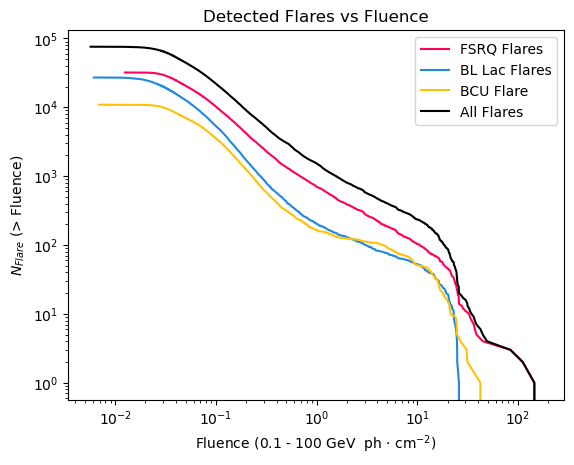

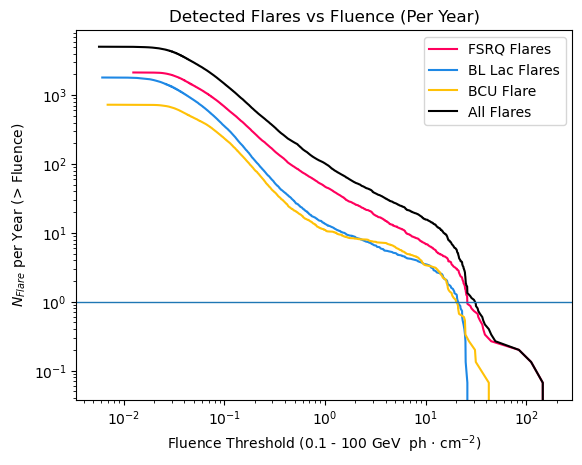

In [14]:
label = ['FSRQ Flares','BL Lac Flares','BCU Flare','All Flares'] # List of labels for categories
cl = ['#FF005D','#1E88E5','#FFC107','000000'] # List of colours for categories
plt.figure()
plt.plot(fsrq_fluencethresholds,fsrq_fluencecount, color=cl[0], label=label[0])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N (number of Fluence Counts)')
plt.xlabel('Fluence Threshold (photons/cm^2)')

plt.plot(bll_fluencethresholds,bll_fluencecount, color=cl[1], label=label[1])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N (number of Fluence Counts)')
plt.xlabel('Fluence Threshold (photons/m^2)')

plt.plot(bcu_fluencethresholds,bcu_fluencecount, color=cl[2], label=label[2])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N (number of Fluence Counts)')
plt.xlabel('Fluence Threshold (photons/m^2)')

plt.plot(total_fluencethresholds,total_fluencecount, color=cl[3], label=label[3])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$N_{Flare}$ (> Fluence)')
plt.xlabel('Fluence (0.1 - 100 GeV  ph \u22c5 cm$^{-2}$)')
plt.title('Detected Flares vs Fluence')


plt.legend()

plt.figure()
label = ['FSRQ Flares','BL Lac Flares','BCU Flare','All Flares'] # List of labels for categories
cl = ['#FF005D','#1E88E5','#FFC107','000000'] # List of colours for categories

plt.plot(fsrq_fluencethresholds,fsrq_fluencecount/15, color=cl[0], label=label[0])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N (number of Fluence Counts)')
plt.xlabel('Fluence Threshold (photns/cm^2)')

plt.plot(bll_fluencethresholds,bll_fluencecount/15, color=cl[1], label=label[1])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N (number of Fluence Counts)')
plt.xlabel('Fluence Threshold (photons/m^2)')

plt.plot(bcu_fluencethresholds,bcu_fluencecount/15, color=cl[2], label=label[2])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N (number of Fluence Counts)')
plt.xlabel('Fluence Threshold (photons/m^2)')

plt.plot(total_fluencethresholds,total_fluencecount/15, color=cl[3], label=label[3])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$N_{Flare}$ per Year (> Fluence)')
plt.xlabel('Fluence Threshold (0.1 - 100 GeV  ph \u22c5 cm$^{-2}$)')
plt.title('Detected Flares vs Fluence (Per Year)')
plt.hlines(1,10**-3,10**3,linewidth=1)

plt.legend()

In [12]:
pd.DataFrame(fsrq_filtered[:,0])
pd.DataFrame(fsrq_fluence)
fsrq_beta = np.zeros((len(names),2))
for i,name in enumerate(names):
    # take sum of k filtered to each name
    # k = duration * flux per flare
    fsrq_beta[i,0] = np.sum(fsrq_filtered[fsrq_filtered[:,0]==name][])
    print('yeah')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4281018301.py, line 7)

In [88]:
pd.DataFrame(fsrq_beta)

,0,1
0,0.0,0.0
1,67.0,0.0
2,0.0,0.0
3,37.0,0.0
4,0.0,0.0
...,...,...
1520,0.0,0.0
1521,0.0,0.0
1522,65.0,0.0
1523,29.0,0.0


In [96]:
pd.DataFrame(fsrq_filtered)

,0,1,2,3,4
0,4FGL J0001.5+2113,1,2e-07,6.21e-08,1.106
1,4FGL J0001.5+2113,2,2.735e-07,5.7451196680312934e-08,1.106
2,4FGL J0001.5+2113,1,2.15e-07,6.74e-08,1.106
3,4FGL J0001.5+2113,1,1.93e-07,7.9e-08,1.106
4,4FGL J0001.5+2113,1,1.84e-07,6.59e-08,1.106
...,...,...,...,...,...
31979,4FGL J2359.2-3134,1,1.39e-07,8.43e-08,0.99
31980,4FGL J2359.2-3134,1,8.73e-07,6.82e-07,0.99
31981,4FGL J2359.2-3134,1,2.15e-07,9.22e-08,0.99
31982,4FGL J2359.2-3134,2,1.225e-07,5.1495266772782136e-08,0.99


## Weekly Cadence

In [78]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)

cadence = 'weekly'
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
#print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]

In [79]:
fsrq_df = select_fsrq()
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
fsrq_nanbins = []
fsrq_nanbinsmatrix = []
for i, fsrq in enumerate(fsrq_names):
    #print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_nanbins.append(len(source_array[source_array['photon_flux2']== -3333]))
    fsrq_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)
fsrq_nanbinsmatrix = np.array(fsrq_nanbinsmatrix)

-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572


In [80]:
bll_df = select_bll()
bll_names = bll_df['Source_Name']

bll_fmatrix = []
bll_fractionalflux = []
bll_nanbins = []
bll_nanbinsmatrix = []
for i, bll in enumerate(bll_names):
    # print(i, bll)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bll_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bll_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bll_fmatrix.append(factors.tolist())
    bll_fractionalflux.append([bll, averageflux, var, var_err])

bll_fmatrix = np.array(bll_fmatrix)
bll_nanbinsmatrix = np.array(bll_nanbinsmatrix)


-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477


In [81]:
bcu_df = select_bcu()
bcu_names = bcu_df['Source_Name']

bcu_fmatrix = []
bcu_fractionalflux = []
bcu_nanbins = []
bcu_nanbinsmatrix = []
for i, bcu in enumerate(bcu_names):
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bcu]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bcu_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bcu_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bcu_fmatrix.append(factors.tolist())
    bcu_fractionalflux.append([bll, averageflux, var, var_err])

bcu_fmatrix = np.array(bcu_fmatrix)
bcu_nanbinsmatrix = np.array(bcu_nanbinsmatrix)


-----------------------------
Selecting unknown type blazars
Total number of variable objects: 364


In [82]:
# This function takes the dataframe of sources of variable objects, and the name of a source.
# It will sort through every entry in the dataframe, and detect consecutive entries with a flux level higher than the average.
# It counts the duration of these flaring states, and notes them in an array 'final', which it returns upon completion.
def flare_detector(name,dataframe):
    final = [0,0,0]
    k=0
    temp =[]
    temp_err=[]
    duration = []
    average=[]
    # This section is for setting up our dataframes which will be used in the following loop.
    # We primarily are eliminating outliers and NaN values that were marked with -3333.
    sourcematrix = dataframe.loc[dataframe['source_name'] == name].reset_index(drop=True)
    fluxmatrix = sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'].reset_index(drop=True)
    averageflux = np.mean(sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'])
    errormatrix = sourcematrix[sourcematrix['photon_flux_error2']!=-3333]['photon_flux_error2'].reset_index(drop=True)
    boolmatrix = fluxmatrix/averageflux > 1  
    boolmatrix = boolmatrix.reset_index(drop=True)
    for i in range(len(fluxmatrix)):
        # If the flux value for index i is greater than the average, then this condition is met.
        if boolmatrix[i] == True:
            temp.append(fluxmatrix[i])
            temp_err.append(errormatrix[i])
        # If the flux value is not above average, and there are values stored in the temp array, we gather them and send them to 'final'.
        elif len(temp) != 0:
            if i != 0:
                duration = ((len(temp)))
                average = np.nanmean(temp)
                error = ((sum(k*k for k in temp_err))**0.5)*(1/(len(temp_err)))
                temp = []
                temp_err = []
                final = np.vstack([final,[duration,average,error]])
        # Otherwise, we add a row of 0's to show that the source has no flaring states.
        else:
            final = np.vstack([final,[0,0,0]])


    return final

In [83]:
# These three loops will run the flare_detector function for each category of blazar.

fsrq_flares = [0,0,0]
for i,name in enumerate(fsrq_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    fsrq_flares = np.vstack([fsrq_flares,flare_detector(name,cadence_df)])

bll_flares = [0,0,0]
for i,name in enumerate(bll_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    bll_flares = np.vstack([bll_flares,flare_detector(name,cadence_df)])

bcu_flares = [0,0,0]
for i,name in enumerate(bcu_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    bcu_flares = np.vstack([bcu_flares,flare_detector(name,cadence_df)])


<function matplotlib.pyplot.show(close=None, block=None)>

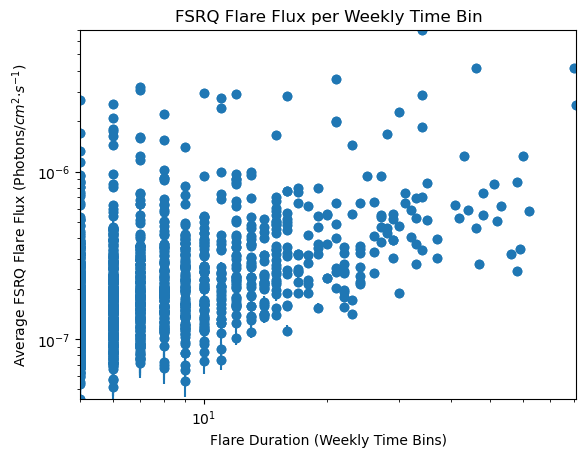

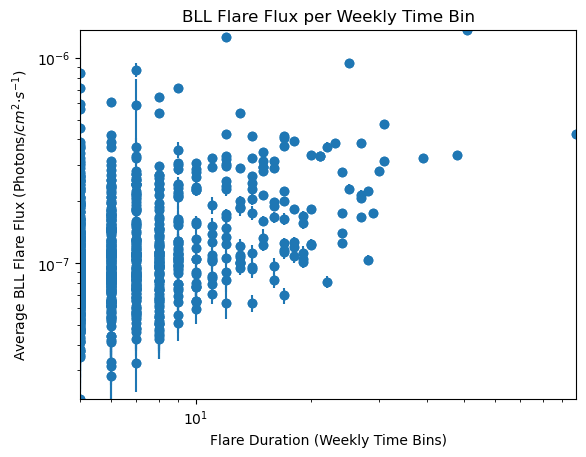

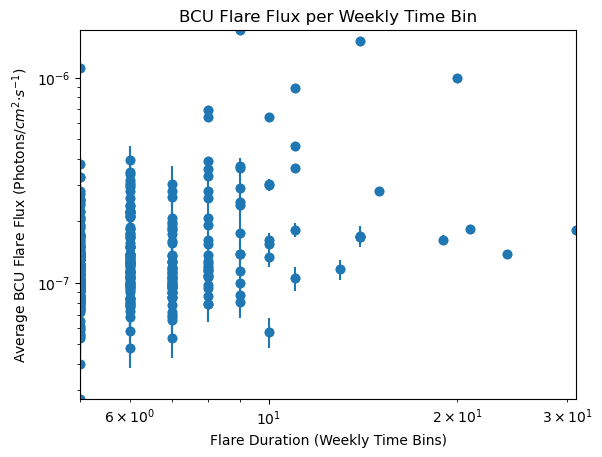

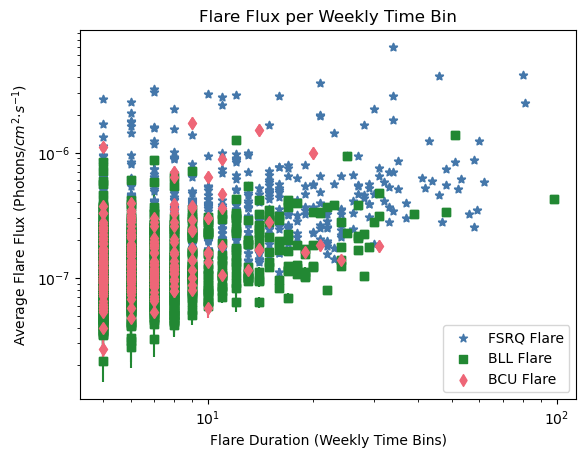

In [84]:

# This section makes four Average Flux vs Duration plots: one for each category of blazars, and a final plot for all three together.
    
fsrq_plot = fsrq_flares[fsrq_flares[:,0]>=5]
fsrq_ysize = fsrq_flares.size
fsrq_x = fsrq_plot[:,0]
fsrq_xmin = min(fsrq_x)
fsrq_xmax = max(fsrq_x)
fsrq_y = fsrq_plot[:,1]
fsrq_ymin = min(fsrq_y)
fsrq_ymax = max(fsrq_y)
fsrq_err=fsrq_plot[:,2]
plt.ylim([fsrq_ymin,fsrq_ymax])
plt.xlim([fsrq_xmin,fsrq_xmax])
plt.scatter(fsrq_x,fsrq_y)
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = 'o')
plt.ylabel('Average FSRQ Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Weekly Time Bins)')
plt.title('FSRQ Flare Flux per Weekly Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bll_plot = bll_flares[bll_flares[:,0]>=5]
bll_ysize = bll_flares.size
bll_x = bll_plot[:,0]
bll_xmin = min(bll_x)
bll_xmax = max(bll_x)
bll_y = bll_plot[:,1]
bll_ymin = min(bll_y)
bll_ymax = max(bll_y)
bll_err=bll_plot[:,2]
plt.ylim([bll_ymin,bll_ymax])
plt.xlim([bll_xmin,bll_xmax])
plt.scatter(bll_x,bll_y)
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 'o')
plt.ylabel('Average BLL Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Weekly Time Bins)')
plt.title('BLL Flare Flux per Weekly Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bcu_plot = bcu_flares[bcu_flares[:,0]>=5]
ysize = bcu_flares.size
bcu_x = bcu_plot[:,0]
bcu_xmin = min(bcu_x)
bcu_xmax = max(bcu_x)
bcu_y = bcu_plot[:,1]
bcu_ymin = min(bcu_y)
bcu_ymax = max(bcu_y)
bcu_err = bcu_plot[:,2]
plt.ylim([bcu_ymin,bcu_ymax])
plt.xlim([bcu_xmin,bcu_xmax])
plt.scatter(bcu_x,bcu_y)
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'o')
plt.ylabel('Average BCU Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Weekly Time Bins)')
plt.title('BCU Flare Flux per Weekly Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

#Combined Graphic
plt.scatter(fsrq_x,fsrq_y,marker = '*',color='#4477AA',label='FSRQ Flare')
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = '*',color='#4477AA')
plt.scatter(bll_x,bll_y,marker = 's',color='#228833',label='BLL Flare')
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 's',color='#228833')
plt.scatter(bcu_x,bcu_y,marker = 'd',color='#EE6677',label='BCU Flare')
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'd',color='#EE6677')
plt.legend()
plt.ylabel('Average Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Weekly Time Bins)')
plt.title('Flare Flux per Weekly Time Bin')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(10,40)
#plt.ylim(0.0000001,0.000002)
plt.show
#Flux is 1/cm^2*s


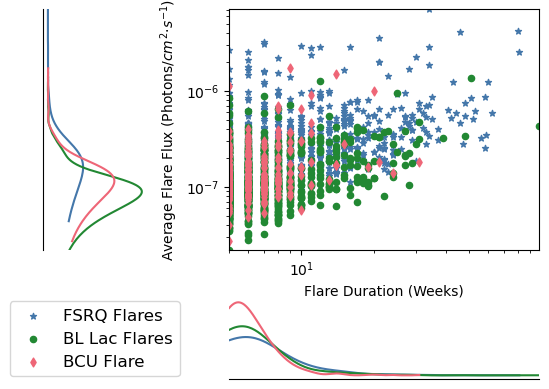

In [85]:
label = ['FSRQ Flares','BL Lac Flares','BCU Flare'] # List of labels for categories
cl = ['#4477AA','#228833','#EE6677'] # List of colours for categories
categories = len(label)


# Set up 4 subplots as axis objects using GridSpec:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1])
# Add space between scatter plot and KDE plots to accommodate axis labels:
gs.update(hspace=0.3, wspace=0.4)

# Set background canvas colour to White instead of grey default
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = plt.subplot(gs[0,1]) # Instantiate scatter plot area and axis range
ax.set_xlim(min(fsrq_xmin,bll_xmin,bcu_xmin), max(fsrq_xmax,bll_xmax,bcu_xmax))
ax.set_ylim(min(fsrq_ymin,bll_ymin,bcu_ymin), max(fsrq_ymax,bll_ymax,bcu_ymax))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Flare Duration (Weeks)')
ax.set_ylabel('Average Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')

axl = plt.subplot(gs[0,0], sharey=ax) # Instantiate left KDE plot area
axl.get_xaxis().set_visible(False) # Hide tick marks and spines
axl.get_yaxis().set_visible(False)
axl.spines["right"].set_visible(False)
axl.spines["top"].set_visible(False)
axl.spines["bottom"].set_visible(False)

axb = plt.subplot(gs[1,1], sharex=ax) # Instantiate bottom KDE plot area
axb.get_xaxis().set_visible(False) # Hide tick marks and spines
axb.get_yaxis().set_visible(False)
axb.spines["right"].set_visible(False)
axb.spines["top"].set_visible(False)
axb.spines["left"].set_visible(False)

axc = plt.subplot(gs[1,0]) # Instantiate legend plot area
axc.axis('off') # Hide tick marks and spines

# Plot data for each categorical variable as scatter and marginal KDE plots:
#FSRQ PLOT
ax.scatter(fsrq_x, fsrq_y, marker = '*', color=cl[0], label=label[0], s=20, edgecolor= cl[0])    
kde = stats.gaussian_kde(fsrq_x)
fsrq_xx = np.linspace(fsrq_xmin,fsrq_xmax,1000)
axb.plot(fsrq_xx,kde(fsrq_xx), color=cl[0],)
kde = stats.gaussian_kde(fsrq_y)
fsrq_yy = np.linspace(fsrq_ymin,fsrq_ymax,1000)
axl.plot(kde(fsrq_yy), fsrq_yy, color=cl[0],)

#BLL PLOT
ax.scatter(bll_x,bll_y, color=cl[1], label=label[1], s=20, edgecolor= cl[1])
kde = stats.gaussian_kde(bll_x)
bll_xx = np.linspace(bll_xmin,bll_xmax,1000)
axb.plot(bll_xx, kde(bll_xx), color=cl[1])
kde = stats.gaussian_kde(bll_y)
bll_yy = np.linspace(bll_ymin,bll_ymax,1000)
axl.plot(kde(bll_yy), bll_yy, color=cl[1])

#BCU PLOT
ax.scatter(bcu_x,bcu_y, marker = 'd', color=cl[2], label=label[2], s=20, edgecolor= cl[2])
kde = stats.gaussian_kde(bcu_x)
bcu_xx = np.linspace(bcu_xmin,bcu_xmax,1000)
axb.plot(bcu_xx, kde(bcu_xx), color=cl[2])
kde = stats.gaussian_kde(bcu_y)
bcu_yy = np.linspace(bcu_ymin,bcu_ymax,1000)
axl.plot(kde(bcu_yy), bcu_yy, color=cl[2])

# Copy legend object from scatter plot to lower left subplot and display:
# NB 'scatterpoints = 1' customises legend box to show only 1 handle (icon) per label 
handles, labels = ax.get_legend_handles_labels()
axc.legend(handles, labels, scatterpoints = 1, loc = 'center', fontsize = 12)
plt.show()

## Monthly Cadence

In [32]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)

cadence = 'monthly'
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
#print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]

In [95]:
fsrq_df = select_fsrq()
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
fsrq_nanbins = []
fsrq_nanbinsmatrix = []
for i, fsrq in enumerate(fsrq_names):
    #print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_nanbins.append(len(source_array[source_array['photon_flux2']== -3333]))
    fsrq_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)
fsrq_nanbinsmatrix = np.array(fsrq_nanbinsmatrix)

-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572


In [96]:
bll_df = select_bll()
bll_names = bll_df['Source_Name']

bll_fmatrix = []
bll_fractionalflux = []
bll_nanbins = []
bll_nanbinsmatrix = []
for i, bll in enumerate(bll_names):
    # print(i, bll)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bll_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bll_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bll_fmatrix.append(factors.tolist())
    bll_fractionalflux.append([bll, averageflux, var, var_err])

bll_fmatrix = np.array(bll_fmatrix)
bll_nanbinsmatrix = np.array(bll_nanbinsmatrix)


-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477


In [97]:
bcu_df = select_bcu()
bcu_names = bcu_df['Source_Name']

bcu_fmatrix = []
bcu_fractionalflux = []
bcu_nanbins = []
bcu_nanbinsmatrix = []
for i, bcu in enumerate(bcu_names):
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bcu]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bcu_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bcu_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bcu_fmatrix.append(factors.tolist())
    bcu_fractionalflux.append([bll, averageflux, var, var_err])

bcu_fmatrix = np.array(bcu_fmatrix)
bcu_nanbinsmatrix = np.array(bcu_nanbinsmatrix)


-----------------------------
Selecting unknown type blazars
Total number of variable objects: 364


In [98]:
# This function takes the dataframe of sources of variable objects, and the name of a source.
# It will sort through every entry in the dataframe, and detect consecutive entries with a flux level higher than the average.
# It counts the duration of these flaring states, and notes them in an array 'final', which it returns upon completion.
def flare_detector(name,dataframe):
    final = [0,0,0]
    k=0
    temp =[]
    temp_err=[]
    duration = []
    average=[]
    # This section is for setting up our dataframes which will be used in the following loop.
    # We primarily are eliminating outliers and NaN values that were marked with -3333.
    sourcematrix = dataframe.loc[dataframe['source_name'] == name].reset_index(drop=True)
    fluxmatrix = sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'].reset_index(drop=True)
    averageflux = np.mean(sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'])
    errormatrix = sourcematrix[sourcematrix['photon_flux_error2']!=-3333]['photon_flux_error2'].reset_index(drop=True)
    boolmatrix = fluxmatrix/averageflux > 1  
    boolmatrix = boolmatrix.reset_index(drop=True)
    for i in range(len(fluxmatrix)):
        # If the flux value for index i is greater than the average, then this condition is met.
        if boolmatrix[i] == True:
            temp.append(fluxmatrix[i])
            temp_err.append(errormatrix[i])
        # If the flux value is not above average, and there are values stored in the temp array, we gather them and send them to 'final'.
        elif len(temp) != 0:
            if i != 0:
                duration = ((len(temp)))
                average = np.nanmean(temp)
                error = ((sum(k*k for k in temp_err))**0.5)*(1/(len(temp_err)))
                temp = []
                temp_err = []
                final = np.vstack([final,[duration,average,error]])
        # Otherwise, we add a row of 0's to show that the source has no flaring states.
        else:
            final = np.vstack([final,[0,0,0]])


    return final

In [99]:
# These three loops will run the flare_detector function for each category of blazar.

fsrq_flares = [0,0,0]
for i,name in enumerate(fsrq_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    fsrq_flares = np.vstack([fsrq_flares,flare_detector(name,cadence_df)])

bll_flares = [0,0,0]
for i,name in enumerate(bll_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    bll_flares = np.vstack([bll_flares,flare_detector(name,cadence_df)])

bcu_flares = [0,0,0]
for i,name in enumerate(bcu_names):
    #print(i,name) 
    #print(flare_detector(name,cadence_df))
    bcu_flares = np.vstack([bcu_flares,flare_detector(name,cadence_df)])


<function matplotlib.pyplot.show(close=None, block=None)>

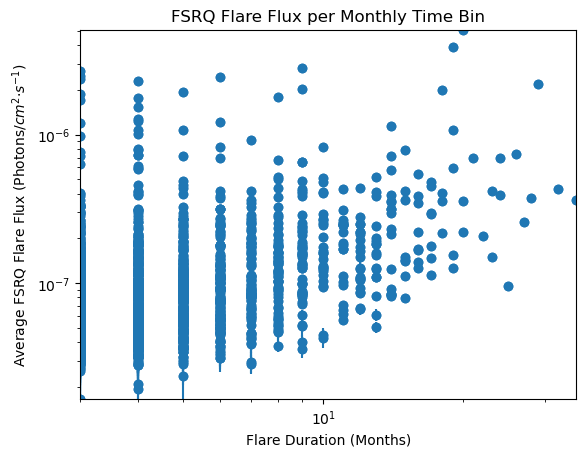

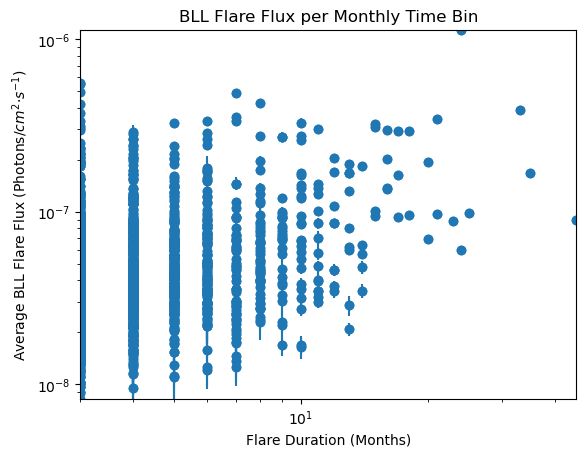

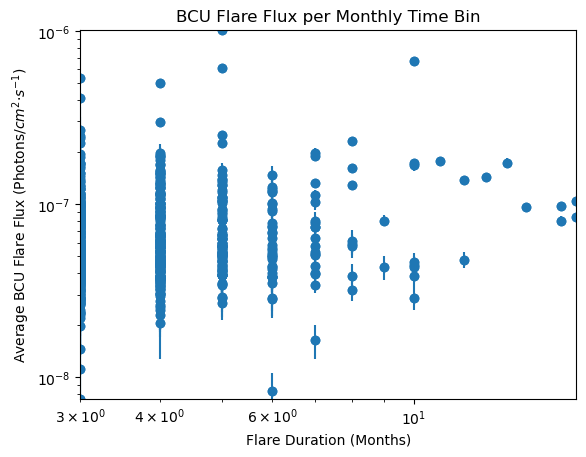

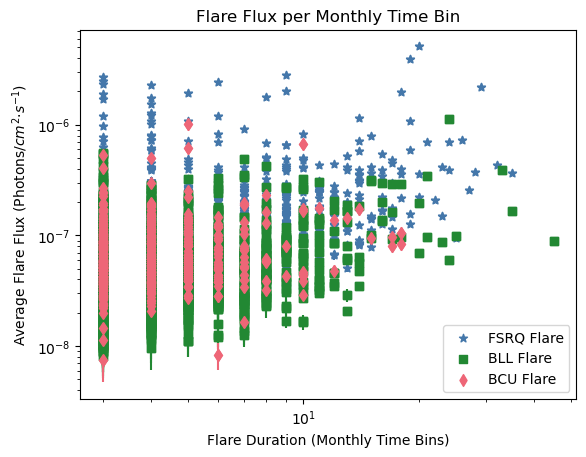

In [100]:

# This section makes four Average Flux vs Duration plots: one for each category of blazars, and a final plot for all three together.
    
fsrq_plot = fsrq_flares[fsrq_flares[:,0]>=3]
fsrq_ysize = fsrq_flares.size
fsrq_x = fsrq_plot[:,0]
fsrq_xmin = min(fsrq_x)
fsrq_xmax = max(fsrq_x)
fsrq_y = fsrq_plot[:,1]
fsrq_ymin = min(fsrq_y)
fsrq_ymax = max(fsrq_y)
fsrq_err=fsrq_plot[:,2]
plt.ylim([fsrq_ymin,fsrq_ymax])
plt.xlim([fsrq_xmin,fsrq_xmax])
plt.scatter(fsrq_x,fsrq_y)
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = 'o')
plt.ylabel('Average FSRQ Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Months)')
plt.title('FSRQ Flare Flux per Monthly Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bll_plot = bll_flares[bll_flares[:,0]>=3]
bll_ysize = bll_flares.size
bll_x = bll_plot[:,0]
bll_xmin = min(bll_x)
bll_xmax = max(bll_x)
bll_y = bll_plot[:,1]
bll_ymin = min(bll_y)
bll_ymax = max(bll_y)
bll_err=bll_plot[:,2]
plt.ylim([bll_ymin,bll_ymax])
plt.xlim([bll_xmin,bll_xmax])
plt.scatter(bll_x,bll_y)
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 'o')
plt.ylabel('Average BLL Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Months)')
plt.title('BLL Flare Flux per Monthly Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bcu_plot = bcu_flares[bcu_flares[:,0]>=3]
ysize = bcu_flares.size
bcu_x = bcu_plot[:,0]
bcu_xmin = min(bcu_x)
bcu_xmax = max(bcu_x)
bcu_y = bcu_plot[:,1]
bcu_ymin = min(bcu_y)
bcu_ymax = max(bcu_y)
bcu_err = bcu_plot[:,2]
plt.ylim([bcu_ymin,bcu_ymax])
plt.xlim([bcu_xmin,bcu_xmax])
plt.scatter(bcu_x,bcu_y)
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'o')
plt.ylabel('Average BCU Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Months)')
plt.title('BCU Flare Flux per Monthly Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

#Combined Graphic
plt.scatter(fsrq_x,fsrq_y,marker = '*',color='#4477AA',label='FSRQ Flare')
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = '*',color='#4477AA')
plt.scatter(bll_x,bll_y,marker = 's',color='#228833',label='BLL Flare')
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 's',color='#228833')
plt.scatter(bcu_x,bcu_y,marker = 'd',color='#EE6677',label='BCU Flare')
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'd',color='#EE6677')
plt.legend()
plt.ylabel('Average Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Flare Duration (Monthly Time Bins)')
plt.title('Flare Flux per Monthly Time Bin')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(10,40)
#plt.ylim(0.0000001,0.000002)
plt.show
#Flux is 1/cm^2*s


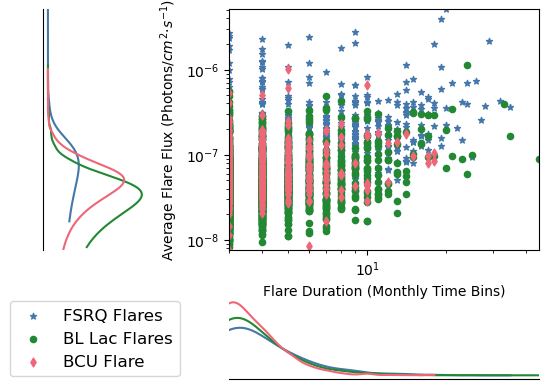

In [101]:
label = ['FSRQ Flares','BL Lac Flares','BCU Flare'] # List of labels for categories
cl = ['#4477AA','#228833','#EE6677'] # List of colours for categories
categories = len(label)


# Set up 4 subplots as axis objects using GridSpec:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1])
# Add space between scatter plot and KDE plots to accommodate axis labels:
gs.update(hspace=0.3, wspace=0.4)

# Set background canvas colour to White instead of grey default
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = plt.subplot(gs[0,1]) # Instantiate scatter plot area and axis range
ax.set_xlim(min(fsrq_xmin,bll_xmin,bcu_xmin), max(fsrq_xmax,bll_xmax,bcu_xmax))
ax.set_ylim(min(fsrq_ymin,bll_ymin,bcu_ymin), max(fsrq_ymax,bll_ymax,bcu_ymax))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Flare Duration (Monthly Time Bins)')
ax.set_ylabel('Average Flare Flux (Photons/$cm^2\u22c5s^{-1}$)')

axl = plt.subplot(gs[0,0], sharey=ax) # Instantiate left KDE plot area
axl.get_xaxis().set_visible(False) # Hide tick marks and spines
axl.get_yaxis().set_visible(False)
axl.spines["right"].set_visible(False)
axl.spines["top"].set_visible(False)
axl.spines["bottom"].set_visible(False)

axb = plt.subplot(gs[1,1], sharex=ax) # Instantiate bottom KDE plot area
axb.get_xaxis().set_visible(False) # Hide tick marks and spines
axb.get_yaxis().set_visible(False)
axb.spines["right"].set_visible(False)
axb.spines["top"].set_visible(False)
axb.spines["left"].set_visible(False)

axc = plt.subplot(gs[1,0]) # Instantiate legend plot area
axc.axis('off') # Hide tick marks and spines

# Plot data for each categorical variable as scatter and marginal KDE plots:
#FSRQ PLOT
ax.scatter(fsrq_x, fsrq_y, marker = '*', color=cl[0], label=label[0], s=20, edgecolor= cl[0])    
kde = stats.gaussian_kde(fsrq_x)
fsrq_xx = np.linspace(fsrq_xmin,fsrq_xmax,1000)
axb.plot(fsrq_xx,kde(fsrq_xx), color=cl[0],)
kde = stats.gaussian_kde(fsrq_y)
fsrq_yy = np.linspace(fsrq_ymin,fsrq_ymax,1000)
axl.plot(kde(fsrq_yy), fsrq_yy, color=cl[0],)

#BLL PLOT
ax.scatter(bll_x,bll_y, color=cl[1], label=label[1], s=20, edgecolor= cl[1])
kde = stats.gaussian_kde(bll_x)
bll_xx = np.linspace(bll_xmin,bll_xmax,1000)
axb.plot(bll_xx, kde(bll_xx), color=cl[1])
kde = stats.gaussian_kde(bll_y)
bll_yy = np.linspace(bll_ymin,bll_ymax,1000)
axl.plot(kde(bll_yy), bll_yy, color=cl[1])

#BCU PLOT
ax.scatter(bcu_x,bcu_y, marker = 'd', color=cl[2], label=label[2], s=20, edgecolor= cl[2])
kde = stats.gaussian_kde(bcu_x)
bcu_xx = np.linspace(bcu_xmin,bcu_xmax,1000)
axb.plot(bcu_xx, kde(bcu_xx), color=cl[2])
kde = stats.gaussian_kde(bcu_y)
bcu_yy = np.linspace(bcu_ymin,bcu_ymax,1000)
axl.plot(kde(bcu_yy), bcu_yy, color=cl[2])

# Copy legend object from scatter plot to lower left subplot and display:
# NB 'scatterpoints = 1' customises legend box to show only 1 handle (icon) per label 
handles, labels = ax.get_legend_handles_labels()
axc.legend(handles, labels, scatterpoints = 1, loc = 'center', fontsize = 12)
plt.show()

## Redshift

In [180]:
df_4lacdr3 = pd.read_csv('4lac_redshifts.csv', delimiter='\t', comment='#')
df_4lacdr3.shape
name = '4FGL J2039.5+5218'
sortedlist = df_4lacdr3[(df_4lacdr3['redshift']>-3333)&(df_4lacdr3['4FGL_name']=='4FGL J0028.4+2001')]
#df_4lacdr3.loc[(df_4lacdr3['redshift']>-3333)&(df_4lacdr3['4FGL_name']==name)].values[0][1]
sortedlist



,4FGL_name,redshift,SED type,nu_sync


In [61]:
pd.DataFrame(df_4lacdr3[df_4lacdr3['redshift']>-3333])

,4FGL_name,redshift,SED type,nu_sync
2,4FGL J0001.4-0010,0.461516,LSP,3.609939e+12
3,4FGL J0001.5+2113,1.106000,ISP,1.584893e+14
10,4FGL J0003.2+2207,0.099830,LSP,8.317638e+13
14,4FGL J0003.9-1149,1.309990,LSP,2.454709e+12
15,4FGL J0004.0+0840,2.057129,ISP,3.019952e+14
...,...,...,...,...
3772,4FGL J2025.3+3341,0.219000,LSP,2.187762e+12
3777,4FGL J2038.7+5117,1.686000,LSP,2.951209e+12
3778,4FGL J2039.5+5218,0.053000,HSP,5.754399e+16
3795,4FGL J2201.8+5048,1.899000,LSP,2.834654e+12
